# Assignment 2 
# Introduction to Python for Data Science Kampus Merdeka
***
**Nama : Tasya Fathia Putriansyah**

**Kode Peserta : PYTN-KS07-018**

## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH `: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE` : The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

# Data Preparation
Import Library and Dataset you need.

In [1]:
# To get import statement 
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

**Numpy**
NumPy (Python Numerik) adalah ekstensi open source dari Python Numerical komputasi. Alat ini dapat digunakan untuk menyimpan dan memproses matriks besar. Numpy jauh lebih efisien daripada struktur nested list Python sendiri. NumPy mendukung operasi array dan matriks beberapa dimensi. Selain itu juga menyediakan sejumlah besar perpustakaan matematika untuk operasi array Dan digunakan di hampir setiap bidang sains dan teknik.

**Pandas**
Pandas adalah tools analisis dan manipulasi data open source yang cepat, powerful, fleksibel, dan mudah digunakan, pandas dibuat pemrograman Python. Pandas menawarkan struktur data dan banyak operasi untuk memanipulasi data. Pandas memungkinkan banyak operasi manipulasi data seperti penggabungan, pembentukan kembali, pembersihan dan fitur perselisihan data.

**Seaborn**
Seaborn adalah library untuk visualisasi data yang dibangun di atas matplotlib. Seaborn memiliki lebih banyak fungsi untuk visualisasi data dan lebih mudah digunakan.

**Statsmodel**
Statsmodels adalah paket python model statistik yang menyediakan banyak kelas untuk mengembangkan model statistik. Paket statsmodel adalah bagian dari modul Scipy, tetapi paket statsmodel saat ini dikembangkan secara terpisah.

In [2]:
# Load the dataset
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
print('Data read into a pandas dataframe')

Data read into a pandas dataframe


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Exploring dataset
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also view the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

To view the dimensions of the dataframe, use the `.shape` parameter.

In [6]:
df.shape #mengetahui dimensi, terdapat 84548 data dengan 22 kolom

(84548, 22)

In [7]:
df.describe() #mendeskripsikan mean, std, dll

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
# Drop 'Unnamed : 0' and 'EASE-MENT' features using .drop function
df.drop(['Unnamed: 0', 'EASE-MENT'], axis = 1, inplace=True)

In [9]:
df.head() #show 5 new row

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


Berdasarkan hasil yang didapat ditemukan bahwa LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH adalah data numerical dn NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT, BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH adalah data categorical.

In [11]:
numeric = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numeric: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
categoric = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categoric:
    df[col] = df[col].astype('category')

In [13]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce') #sale date dengan format datetime

Let's view dtype of each features in dataframe using `.info()` function.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [15]:
df.duplicated().sum() #mengecek apakah ada data yang terduplikat

765

In [16]:
df.drop_duplicates(inplace=True) #mendrop data yang terduplikat
df.duplicated().sum()

0

In [17]:
df.isnull().sum() #memeriksa apakah dataframe ada nilai null

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [18]:
df.isna().sum() /len(df) *100 #memeriksa apakah dataframe ada nilai null dalam persen

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.097001
GROSS SQUARE FEET                 32.685628
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

In [19]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE
percent missing          31.097001          32.685628     16.9199
how many missing      26054.000000       27385.000000  14176.0000


In [20]:
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median(), inplace=True)

In [21]:
df = df.dropna() #mendrop nilai yang missing/hilang
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Exploratory Data Analysis

Dengan memisalkan dimana untuk Borough yang bernilai 
- 1 : 'Manhattan'
- 2 : 'Bronx'
- 3 : 'Brooklyn'
- 4 : 'Queens'
- 5 : 'Staten Island'

In [22]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,65629.000000,65629.000000,65629.000000,65629.000000,65629.000000,65629.0,65629.000000,6.562900e+04,65629.000000,65629.000000,6.562900e+04
mean,2.925399,4222.346981,392.817626,10729.429612,1.633226,0.0,1.655259,2.698046e+03,2023.791967,1792.087629,9.952969e+05
std,1.250494,3454.870029,668.990427,1291.520478,9.540539,0.0,9.537896,2.534878e+04,7961.085047,533.639273,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.000000,1349.000000,22.000000,10306.000000,0.000000,0.0,0.000000,1.900000e+03,1231.000000,1920.000000,2.400000e+05
50%,3.000000,3393.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.314000e+03,1680.000000,1940.000000,5.294900e+05
75%,4.000000,6232.000000,1002.000000,11249.000000,2.000000,0.0,2.000000,2.500000e+03,1890.000000,1965.000000,9.219560e+05
max,5.000000,16319.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,600613.000000,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with .describe() function for RESIDENTIAL UNITS features.

In [23]:
df[df['RESIDENTIAL UNITS']==0].describe()
# Write your function below

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,20855.000000,20855.000000,20855.000000,20855.000000,20855.0,20855.000000,20855.000000,2.085500e+04,2.085500e+04,20855.000000,2.085500e+04
mean,2.472453,3347.129945,250.811988,10347.306114,0.0,0.392999,0.462335,4.057519e+03,3.329339e+03,1716.417310,1.632257e+06
std,1.275097,2940.939158,534.381596,2073.301769,0.0,16.421262,16.421568,5.238821e+04,3.022231e+04,631.778616,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1179.000000,11.000000,10024.000000,0.0,0.000000,0.000000,6.000000e+02,0.000000e+00,1924.000000,1.825000e+05
50%,3.000000,2061.000000,36.000000,11004.000000,0.0,0.000000,0.000000,2.314000e+03,1.680000e+03,1949.000000,3.950000e+05
75%,4.000000,5626.500000,100.000000,11236.000000,0.0,0.000000,0.000000,2.314000e+03,1.680000e+03,1961.000000,8.500000e+05
max,5.000000,16315.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,1.617206e+06,2017.000000,2.210000e+09


In [24]:
df['BOROUGH'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
3        1
4        1
6        1
9        1
        ..
84543    5
84544    5
84545    5
84546    5
84547    5
Name: BOROUGH, Length: 69607, dtype: int64>

In [25]:
means = df.groupby('BOROUGH')['SALE PRICE'].mean()
print(means)

BOROUGH
1    3.344642e+06
2    5.946771e+05
3    8.410834e+05
4    7.388827e+05
5    5.436113e+05
Name: SALE PRICE, dtype: float64


In [26]:
medians = df.groupby('BOROUGH')['SALE PRICE'].median()
print(medians)

BOROUGH
1    1155000.0
2     274897.0
3     425605.0
4     495000.0
5     465000.0
Name: SALE PRICE, dtype: float64


In [27]:
arr_mode=[]
for i in range(df['BOROUGH'].max()):
    arr_mode.append(df[df.BOROUGH == i+1]['SALE PRICE'].mode())
    print("BOROUGH - ",i+1,"= ",arr_mode[i])

BOROUGH -  1 =  0    10.0
Name: SALE PRICE, dtype: float64
BOROUGH -  2 =  0    0.0
Name: SALE PRICE, dtype: float64
BOROUGH -  3 =  0    0.0
Name: SALE PRICE, dtype: float64
BOROUGH -  4 =  0    10.0
Name: SALE PRICE, dtype: float64
BOROUGH -  5 =  0    10.0
Name: SALE PRICE, dtype: float64


In [28]:
arr_range=[]
for i in range(df['BOROUGH'].max()):
    arr_range.append(df[df.BOROUGH == i+1]['SALE PRICE'].max()-
                    df[df.BOROUGH == i+1]['SALE PRICE'].min())
    print("BOROUGH - ",i+1,"= ",arr_range[i])

BOROUGH -  1 =  2209999999.0
BOROUGH -  2 =  110000000.0
BOROUGH -  3 =  345000000.0
BOROUGH -  4 =  257499999.0
BOROUGH -  5 =  121999999.0


In [29]:
arr_var=[]
for i in range(df['BOROUGH'].max()):
    arr_var.append(df[df.BOROUGH == i+1]['SALE PRICE'].var(ddof=1))
    print("BOROUGH - ",i+1,"= ",arr_var[i])

BOROUGH -  1 =  582762827117124.1
BOROUGH -  2 =  7803692804477.106
BOROUGH -  3 =  15617607153086.766
BOROUGH -  4 =  10416242290163.438
BOROUGH -  5 =  3631099702626.528


In [30]:
arr_sd=[]
for i in range(df['BOROUGH'].max()):
    arr_sd.append(df[df.BOROUGH == i+1]['SALE PRICE'].std(ddof=1))
    print("BOROUGH - ",i+1,"= ",arr_sd[i])

BOROUGH -  1 =  24140481.087110177
BOROUGH -  2 =  2793509.0485762
BOROUGH -  3 =  3951911.835186454
BOROUGH -  4 =  3227420.377044713
BOROUGH -  5 =  1905544.463565867


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probabilitas')

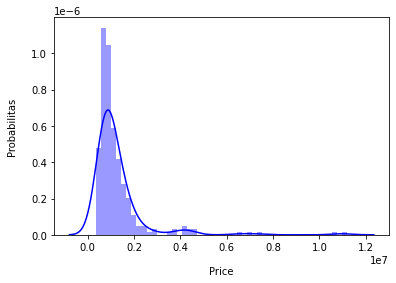

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_means=[]
n = 25

for sample in range (0,300):
    sample_values = np.random.choice(a=df['SALE PRICE'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
sns.distplot(sample_means, color="blue")
plt.xlabel("Price", labelpad=14)
plt.ylabel("Probabilitas", labelpad=14)

# Mean, Median, Modus

In [32]:
mean_saleprice = statistics.mean(df['SALE PRICE'])
mean_landsq = statistics.mean(df['LAND SQUARE FEET'])
mean_grosssq = statistics.mean(df['GROSS SQUARE FEET'])
print("Mean dari data Sale Price : ",mean_saleprice)
print("Mean dari data Land Square Feet : ",mean_landsq)
print("Mean dari data Gross Square Feet : ",mean_grosssq)

Mean dari data Sale Price :  1280703.0003016938
Mean dari data Land Square Feet :  3170.683192782335
Mean dari data Gross Square Feet :  2952.1860876061314


In [33]:
median_saleprice = statistics.median(df['SALE PRICE'])
median_landsq = statistics.median(df['LAND SQUARE FEET'])
median_grosssq = statistics.median(df['GROSS SQUARE FEET'])
print("Mean dari data Sale Price : ",median_saleprice)
print("Mean dari data Land Square Feet : ",median_landsq)
print("Mean dari data Gross Square Feet : ",median_grosssq)

Mean dari data Sale Price :  533000.0
Mean dari data Land Square Feet :  2314.0
Mean dari data Gross Square Feet :  1680.0


In [34]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_BuildClassCategory = statistics.mode(df['BUILDING CLASS CATEGORY'])
mode_BuildClassAP       = statistics.mode(df['BUILDING CLASS AT PRESENT'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Building Class Category         :" , mode_BuildClassCategory )
print("Mode Building Class at Present       :" , mode_BuildClassAP )

Mode Borough                         : 3
Mode Neighborhood                    : FLUSHING-NORTH
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    
Mode Building Class at Present       : D4


# Range, Variance, Standard Deviation

In [35]:
range_saleprice = np.ptp(df['SALE PRICE'])
print("Range dari Sale Price : ",range_saleprice)

Range dari Sale Price :  2210000000.0


In [36]:
range_grosssf = np.ptp(df['GROSS SQUARE FEET'])
print("Range dari Gross Square Feet : ",range_grosssf)

Range dari Gross Square Feet :  3750565.0


In [37]:
range_landsf = np.ptp(df['LAND SQUARE FEET'])
print("Range dari Land Square Feet : ", range_landsf)

Range dari Land Square Feet :  4252327.0


In [38]:
var_saleprice = statistics.variance(df['SALE PRICE'])
var_landsf = statistics.variance(df['LAND SQUARE FEET'])
var_grosssf = statistics.variance(df['GROSS SQUARE FEET'])
print("varian dari data Sale Price : ",var_saleprice)
print("Varian dari data Land Square Feet : ",var_landsf)
print("Varian dari data Gross Square Feet : ",var_grosssf)

varian dari data Sale Price :  130653226969398.58
Varian dari data Land Square Feet :  1099472159.644855
Varian dari data Gross Square Feet :  587699726.023771


In [39]:
std_saleprice = statistics.stdev(df['SALE PRICE'])
std_landsf = statistics.stdev(df['LAND SQUARE FEET'])
std_grosssf = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standar Deviasi dari data Sale Price : ",std_saleprice)
print("Standar Deviasi dari data Land Square Feet : ",std_landsf)
print("Standar Deviasi dari data Gross Square Feet : ",std_grosssf)

Standar Deviasi dari data Sale Price :  11430364.253574712
Standar Deviasi dari data Land Square Feet :  33158.28945595437
Standar Deviasi dari data Gross Square Feet :  24242.518970267323


# Probability Distribution

## Normal Distribution

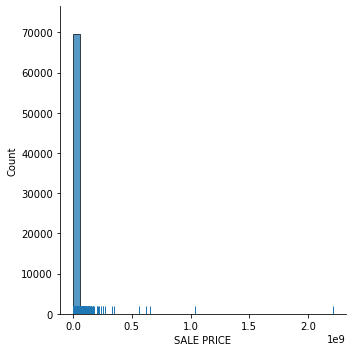

In [40]:
sns.displot(df['SALE PRICE'], bins=40, rug=True)

In [41]:
df_saleprice = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

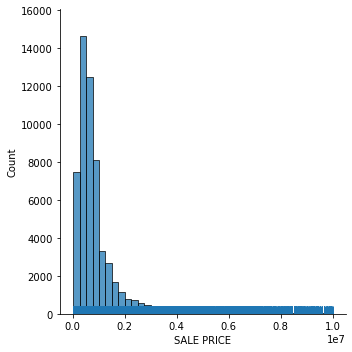

In [42]:
sns.displot(df_saleprice['SALE PRICE'], bins=40, rug=True)

Plot diatas sudah terlihat lebih baik daripada sebelumnya tetapi masih belum menunjukkan plot data yang terdistribusi normal. Oleh karena itu diperlukan normalisasi data dengan menggunakan transformasi. Transformasi yang digunakan yaitu transformasi log.

In [43]:
df_saleprice['LOG_PRICE'] = np.log(df_saleprice['SALE PRICE'])

C:\Users\user\AppData\Local\Temp\ipykernel_11344\3949304601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleprice['LOG_PRICE'] = np.log(df_saleprice['SALE PRICE'])


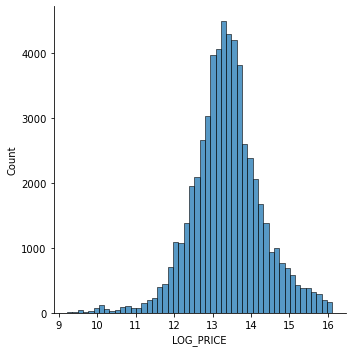

In [44]:
sns.displot(df_saleprice['LOG_PRICE'], bins=50)

Setelah ditransformasi, plot data sudah memenuhi karakteristik distribusi normal yaitu terlihat bahwa kurva bersifat simetris dengan bentuk lonceng (bell curve). Sehingga dapat disimpulkan data Sale Price dari 10.000 - 10.000.000 berdistribusi normal dengan transformasi log.

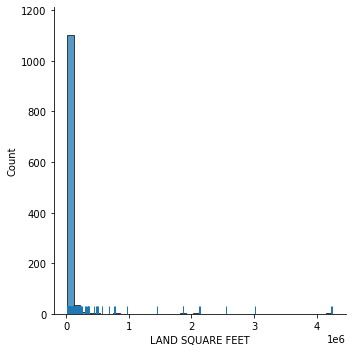

In [45]:
df_landsf = df[(df['LAND SQUARE FEET'] > 10000) & (df['LAND SQUARE FEET'] < 10000000)]
sns.displot(df_landsf['LAND SQUARE FEET'], bins=40, rug=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11344\1436157739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landsf['LOG_LAND'] = np.log(df_landsf['LAND SQUARE FEET'])


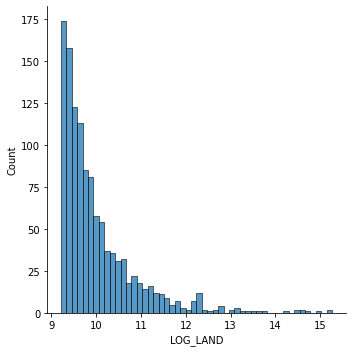

In [46]:
df_landsf['LOG_LAND'] = np.log(df_landsf['LAND SQUARE FEET'])
sns.displot(df_landsf['LOG_LAND'], bins=50)

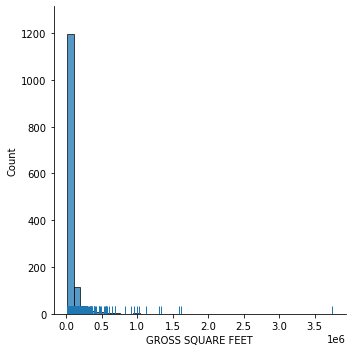

In [47]:
df_grosssf = df[(df['GROSS SQUARE FEET'] > 10000) & (df['GROSS SQUARE FEET'] < 10000000)]
sns.displot(df_grosssf['GROSS SQUARE FEET'], bins=40, rug=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11344\1770270442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grosssf['LOG_GROSS'] = np.log(df_grosssf['GROSS SQUARE FEET'])


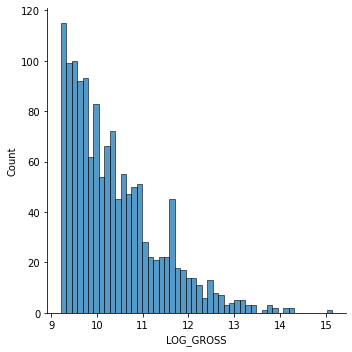

In [48]:
df_grosssf['LOG_GROSS'] = np.log(df_grosssf['GROSS SQUARE FEET'])
sns.displot(df_grosssf['LOG_GROSS'], bins=50)

In [49]:
df.groupby("BOROUGH")["SALE PRICE"].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
1,14374.0,3.344642e+06,2.414048e+07,1.0,660000.0,1155000.0,2461698.75,2.210000e+09
2,6994.0,5.946771e+05,2.793509e+06,0.0,0.0,274897.0,500000.00,1.100000e+08
3,23843.0,8.410834e+05,3.951912e+06,0.0,0.0,425605.0,938000.00,3.450000e+08
4,18410.0,7.388827e+05,3.227420e+06,1.0,285000.0,495000.0,775000.00,2.575000e+08
5,5986.0,5.436113e+05,1.905544e+06,1.0,325000.0,465000.0,600000.00,1.220000e+08


# Confidence Intervals

## CI for the population proportion

Berdasarkan hasil data sebelumnya diperoleh rata-rata Sale Price untuk property di New York yaitu 1.280.703 dan wilayah yang paling sering muncul yaitu wilayah Brooklyn.

Bagaimana CI untuk proporsi property terjual di wilayah Brooklyn?

In [50]:
mean_brooklyn = 8.41
sd = 3.95       
n = 23843       
z = 1.96
se = sd/np.sqrt(n)
se

0.025580948668524728

In [51]:
lowerlimit = mean_brooklyn-z*se #lower limit of the CI
upperlimit = mean_brooklyn+z*se#upper limit of the CI
lowerlimit,upperlimit 

(8.359861340609692, 8.460138659390308)

Dari perhitungan diperoleh Confidence interval untuk proporsi property di wilayah Brooklyn adalah di rentang 8.35 sampai 8.46.

# Hypothesis Testing

## Difference in Population Means

Apakah ada perbedaan residential unit yang terjual pada tahun 2005 - 2009 dan tahun 2010 ke atas?

Population:
- Total Units in NYC Property Sales data

Parameter of Interest:
- $\mu_1 − \mu_2$
- Year Built

Taraf signifikansi :
- $\alpha$ = 5% = 0.05

Hypothesis :

- $H_0$ (Null Hypothesis) : $\mu_1 − \mu_2$ (tidak terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas)
- $H_1$ (Alternative Hypthosis) : $\mu_1 \ne \mu_2$ (terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas)

In [52]:
df_res = df[['RESIDENTIAL UNITS','YEAR BUILT']]
df_res.head()

,RESIDENTIAL UNITS,YEAR BUILT
0,5,1900
3,10,1913
4,6,1900
6,8,1920
9,24,1920


In [53]:
df_res["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
df_pvalue1 = df_res[
    (df_res['YEAR BUILT'] > 2005) &
    (df_res['YEAR BUILT'] < 2010)]
df_pvalue1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11344\3152287889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,RESIDENTIAL UNITS,YEAR BUILT
11,10,2009
129,1,2008
184,1,2006
186,1,2007
488,1,2007


In [54]:
df_pvalue2 = df_res[(df_res['YEAR BUILT'] > 2010)]
df_pvalue2.head()

,RESIDENTIAL UNITS,YEAR BUILT
95,1,2014
100,1,2014
104,1,2014
112,1,2014
133,1,2014


In [55]:
n1 = len(df_pvalue1)
mu1 = df_pvalue1["RESIDENTIAL UNITS"].mean()
sd1 = df_pvalue1["RESIDENTIAL UNITS"].std()
n2 = len(df_pvalue2)
mu2 = df_pvalue2["RESIDENTIAL UNITS"].mean()
sd2 = df_pvalue2["RESIDENTIAL UNITS"].std()

In [56]:
(n1, mu1, sd1)

(2982, 1.5808182427900739, 6.642649922163771)

In [57]:
(n2, mu2, sd2)

(4139, 1.5426431505194491, 6.402505692354724)

In [58]:
sm.stats.ztest(df_pvalue1["RESIDENTIAL UNITS"], df_pvalue2["RESIDENTIAL UNITS"], alternative='two-sided')

(0.244354920624127, 0.806955951776814)

In [59]:
df['SALE PRICE'].describe().astype(int)

count         69607
mean        1280703
std        11430364
min               0
25%          230000
50%          533000
75%          950000
max     -2147483648
Name: SALE PRICE, dtype: int32

In [60]:
# Calculate confidence interval of 95%

# CI components
z_score = 1.96 # 95% confidence level
mean_price = np.mean(df['SALE PRICE'])
stdev_price = np.std(df['SALE PRICE'])
size_price = np.size(df['SALE PRICE'])

# Calculate boundary
lcb = mean_price - z_score * stdev_price / np.sqrt(size_price)
ucb = mean_price + z_score * stdev_price / np.sqrt(size_price)

# Output
print('Upper Boundary: ', ucb)
print('Lower Boundary: ', lcb)

Upper Boundary:  1365618.4206612557
Lower Boundary:  1195787.5799421319


# Conclusion

Sehingga dapat diperolah suatu kesimpulan yaitu,

Syarat penolakan $H_0$ :

$H_0$ ditolak jika nilai $p_{value} < \alpha$ = 0.05
Keputusan :

$H_0$ diterima karena nilai $p_{value} = 0.806955951776814 > \alpha$ = 0.05
Kesimpulan :

Pada taraf signifikansi 5%, karena nilai $p_{value} = 0.806955951776814 > \alpha$ = 0.05 maka kita dapat menerima H0 sehingga tidak terdapat perbedaan residential unit yang terjual pada tahun 2005 - 2009 dan tahun 2010 keatas (rata-rata residential unit yang terjual pada tahun 2005 - 2009 sama dengan property yang dibangun pada tahun 2010 keatas)